# Example fit

This example shows a complete analysis of the data set included in Exercise 6.2 of [*Measurements and their Uncertainties*](http://www.oupcanada.com/catalog/9780199566334.html), by Hughes and Hase.

## Preliminaries
This analysis is done in the Python programming language using a Jupyter notebook interface. Python has hundreds of specialized packages for scientific applications, but we will restrict ourselves here to the core packages that are commonly used in data analysis. We will describe them as we use them, leaving a more comprehensive introduction to Python and its associated scientific programming ecosystem for later. You can find more documentation at the links below.
* [Python](https://docs.python.org/3/tutorial/index.html): the high-level computing language
* [Jupyter](https://jupyter-notebook.readthedocs.io/en/latest/): the notebook interface for Python programming and documentation
* [NumPy](https://docs.scipy.org/doc/numpy-1.15.0/user/index.html): a numerical computing package
* [matplotlib](https://matplotlib.org/users/index.html): a scientific visualization package
* [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html): an extension of the NumPy package that includes additional functionality for scientific applications
* [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet#emphasis): the markup language used for formatting text cells in Jupyter—this is not technically part of Python, but is useful for documenting Python-based analysis in Jupyter notebooks

## Step 1: Import packages
We will need NumPy, the `pyplot` subpackage from matplotlib, and the `curve_fit` routine from SciPy, so we import these into the notebook in the following cell.

The first line in the cell is a comment, *# Import packages*, which we identify by beginning the line with the "*#*" character. Python ignores these lines, so we can use them to include brief comments in plain English that describe what the Python code does.

The first line of code in the cell tells Python to load the `numpy` package under the name `np`, which is a standard abbreviation that is more convenient for typing. Similarly, `matplotlib.pyplot` is commonly abbreviated as `plt`. Both `np` and `plt` include a variety of routines, as we will see below. The third line imports just the `curve_fit` routine from the `scipy.optimize` subpackage of SciPy, without assigning an abbreviated name to it.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Step 2: Load the data
### Load the data: examine the format
The data for this example is contained in the file `Example-Data.csv`, which you should open in a text editor to view. But since we are already in a Jupyter notebook, we can also use Python built-in functions to view its contents. In the cell below, the first line opens the file, and the second line displays its contents.

In [2]:
# Display file contents
file = open('Example-Data.csv', 'r')
print(file.read())

Frequency (Hz),Voltage (mV),Error (mV)
10,16,5
20,45,5
30,64,5
40,75,5
50,70,30
60,115,5
70,142,5
80,167,5
90,183,5
100,160,30
110,221,5


The file contains three columns of data in what is known as *comma-separated value* or CSV format. Each line includes three items, separated from each other by commas—thus the name "comma-separated value." The first line includes the labels for each column, and all subsequent lines represent measurements of the frequency, voltage, and voltage error. For simple tabular data this is the best format to use, since it is platform-independent, human-readable, and widely adopted by other software packages, including NumPy and Microsoft Excel. See the [Data Management FAQ](https://www.lib.sfu.ca/help/publish/research-data-management/data-management-faqs#which-file-formats-should-i-use-when-working-with-data) at the SFU Library for more information on file formats that are appropriate for research data.

### Load the data: import the data into an array
So far, all we have done is displayed the contents of `Example-Data.csv` on the screen. For analysis, we need to convert the file into an array of *numbers*, which we will do using the `genfromtext` routine from NumPy.

In the cell below, the call to `np.genfromtext` in the first line tells Python to find the `genfromtext` routine in the NumPy package (loaded at the beginning under the label `np`), then use it to convert the contents of `Example-Data.csv` into a numerical array that we assign to `data`. The call to `genfromtext` includes three arguments: the file name, the delimeter (i.e., the character that separates items in different columns), and the number of header lines to skip. The `genfromtext` [help](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) page describes many more options that can be included, depending on the circumstances. The `print` functions in the second and third lines show the contents of this array.

In [3]:
# Load file into array
data = np.genfromtxt('Example-Data.csv', delimiter=',', skip_header = 1)
print("data =")
print(data)

data =
[[ 10.  16.   5.]
 [ 20.  45.   5.]
 [ 30.  64.   5.]
 [ 40.  75.   5.]
 [ 50.  70.  30.]
 [ 60. 115.   5.]
 [ 70. 142.   5.]
 [ 80. 167.   5.]
 [ 90. 183.   5.]
 [100. 160.  30.]
 [110. 221.   5.]]


Let's take a moment to compare the output of the `print(data)` statement above with that of the `print(file.read())` statement in the previous cell. Whereas the `print(file.read())` statement simply copied the text contained in `Example-Data.csv` to the screen, the `print(data)` statement *converts* the numerical information in `data` back into a standardized text format for display. Each row of the array is indicated by square brackets (`[]`), and these rows are then stacked into a larger array that is also enclosed by square brackets. The overall output, then, reads as follows:

1. The `[[` at the beginning tells us we have a two-dimensional array. The first `[` denotes the start of the entire set of rows, and the second `[` denotes the start of the first row.
2. The first row is `[ 10.  16.   5.]`, the second row is `[ 20.  45.   5.]`, etc.
3. The `]]` at the end tells us that we have come to the end of the two-dimensional array. The first `]` denotes the end of the last row, and the second `]` denotes the end of the entire set of rows.

Each element of `data` is associated with a set of *indices*, which we can access using the notation `data[i,j]`, where `i` is the row number and `j` is the column number. Indices start from zero in Python, so in this example, the eleven rows and three columns of `data` are indexed by `i = 0, 1, ... 10` and `j = 0, 1, 2`.

To check that you understand how indexing works, compare the array above with the output from the cell below.

In [4]:
# Display some array elements
first = data[0,0]
last = data[10,2]
middle = data[5,1]
print("first =", first)
print("last =", last)
print("middle =", middle)

first = 10.0
last = 5.0
middle = 115.0


The colon character `:` is a shorthand notation for the entire set of values allowed for a particular index, and allows us access to an entire row or column. In the cell below, we use it to assign each column of `data` to the new variables `frequency`, `voltage`, and `err`, for later use.

In [5]:
# Assign each array column to a separate array
frequency = data[:,0]
voltage = data[:,1]
err = data[:,2]
print("frequency =", frequency)
print("voltage =", voltage)
print("err =", err)

frequency = [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110.]
voltage = [ 16.  45.  64.  75.  70. 115. 142. 167. 183. 160. 221.]
err = [ 5.  5.  5.  5. 30.  5.  5.  5.  5. 30.  5.]


## Step 3: Plot the data
To plot the data for analysis, we turn to the routines contained in `matplotlib.pyplot`, which we imported earlier under the abbreviated name `plt`. All of the PyPlot routines are listed on its [help page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html), which links to additional help on each routine.

The following cell shows the voltage as a function of frequency, with the voltage uncertainty represented by an error bar. The first line calls the `errorbar` routine from `plt`. The first two arguments of `errorbar` are required, and correspond to the $x$ and $y$ variables in the plot, respectively. The third argument, `yerr=err`, tells `errorbar` to show errobars that extend `err` above and below the data point along the $y$ axis. The fourth argument, `fmt='ko'` causes the data points to be represented as black (`k`) circles (`o`). For more details on `errorbar`, see its [help page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html). After the `errorbar` statement, the next three lines produce labels for the $x$ and $y$ axes, along with the title. The last line displays the plot.

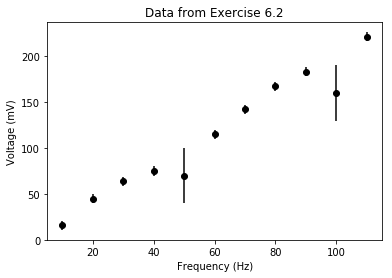

In [6]:
# Plot data
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (mV)')
plt.title('Data from Exercise 6.2')
plt.show()

## Step 4: Define the model function
In this example we fit the data with a simple linear model,

$$y = mx+b,$$

where $x$ represents the frequency, $y$ the voltage, and $m$ and $b$ represent *unknown fit parameters* that we will determine from the data.

In the cell below we use the Python statement `def` to define this model function. The first line specifies `model` as the name of the function and indicates what arguments it expects. For consistency with the `curve_fit` routine, we reserve the first argument for the independent variable `x`, followed by the fit parameters `m` and `b`. The second line uses the Python statement `return` to specify the output of `model`, which in this case is the output of the expression `m*x + b`. *It is important to note here that the* `return` *statment is indented.* Unlike many other programming languages, Python assigns significance to indentation. Here, it assumes that any indented text after the `def` statement is part of the function definition.

In [7]:
# Define model function
def model(x,m,b):
    return m*x + b

## Step 5: Choose initial parameter values for the model
After defining the model, it is generally good practice to compare the model to the data at a qualitative level before handing it off to the computer for a quantitative fit. Doing this will help you catch any mistakes in your model definition, develop an intuition for how the fit quality varies with the parameters, and choose initial values for the parameters that are reasonably close to optimal. The simple model in our example will converge regardless of the initial parameter choice, but in more complex models, having good values for the initial fit parameters is often essential to achieving a good fit.

If you inspect the raw data in the errorbar plot above, you should see that the slope is close to two and the intercept is close to zero. You can also see this relationship in the tabular data, where most of the voltage values (in Hz) are about twice the frequency values (in mV). Consequently, we assign the initial parameter values `mInit = 2` and `bInit = 0` in the first two lines of code in the cell below. The remaining lines create a plot that shows how the model fits the data with these preliminary values for the fit parameters. 

First, we use the NumPy routine `linspace` to create `fModel`, an array with fifty equally-spaced points ranging from 0 to 120. This allows us to extend the model curve to frequencies outside of the range of the original data. Also, for models that are not simply a straight line, it provides us with a way to control how smooth the model curve looks by adjusting the point density.

Next, we use `plot` from PyPlot to show the model curve evaluated at all fifty points in `fModel` with the parameters `mInit` and `bInit`. The third argument, `'r-'`, tells `plot` to represent this as a red line. The next lines use `errorbar`, `xlabel`, `ylabel`, and `title` to add the data as an errorbar plot, label the axes, and add a title, just as before. We then use `xlim` and `ylim` to adjust the limits of the $x$ and $y$ axes, respectively, and `show` to display the final plot.

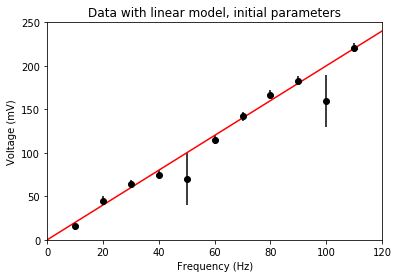

In [8]:
# Set initial parameters m0 and b0
mInit = 2
bInit = 0

# Define new frequency array, fModel, for displaying the model
fModel = np.linspace(0,120,50)

# Make the plot
# Recall the order of the arguments in the model definition, model(x,m,b):
plt.plot(fModel,model(fModel,mInit,bInit),'r-')
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (mV)')
plt.title('Data with linear model, initial parameters')
plt.xlim(0,120)
plt.ylim(0,250)
plt.show()

This is already good agreement, but we can do better, as we will see in the next step.

## Step 6: Fit the model to the data
Now we have everything we need to use `curve_fit` to find the parameter values that provide the best fit of the model to the data. As described in the [help](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), `curve_fit` has three required arguments: the model, the data $x$ values, and the data $y$ values, in that order. We also include three additional optional arguments. The expression `p0=[mInit,bInit]` specifies the initial guess for the parameters, expressed as a single array in the order of their appearance in `model`. Next, `sigma=err` specifies the uncertainty in the data $y$ values, and `absolute_sigma=True` indicates that these uncertainties are known independently, as is usually the case in physics but less common in other disciplines.

The first output of `curve_fit`, `pOpt`, is an array of the optimal parameter values, listed again in the order of their appearance in `model`. We can write it in matrix form as

$$ \hat{\mathbf{p}} = \begin{bmatrix}\hat{p}_0\\ \hat{p}_1\end{bmatrix} = \begin{bmatrix}\hat{m}\\ \hat{b}\end{bmatrix},$$

where the notation $\hat{m}$ indicates the optimal value for the parameter $m$.

The second output, `pCov`, is a two-dimensional array that corresponds to the parameter *covariance matrix*, which provides an estimate of the parameter uncertainty and correlation. As described in Chapter 7 of Hughes and Hase, the diagonal elements of `pCov` correspond to the *variance* of the associated parameters. In our example, the covariance matrix is

$$ \mathbf{C} = \begin{bmatrix}C_{00} & C_{01}\\ C_{10} & C_{11}\end{bmatrix} = \begin{bmatrix}\alpha_m^2 & \rho_{mb}\alpha_m\alpha_b\\ \rho_{mb}\alpha_m\alpha_b & \alpha_b^2\end{bmatrix}, $$

where $\alpha_m$ is the standard error in the slope estimate $\hat{m}$, $\alpha_b$ is the standard error in the intercept estimate $\hat{b}$, and $\rho_{mb}$ is the *correlation coefficient* between $\hat{m}$ and $\hat{b}$, discussed in Sec. 7.3 of Hughes and Hase.

In [9]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model,frequency,voltage,p0=[mInit,bInit],sigma=err,absolute_sigma=True)
print("[mOpt bOpt] =", pOpt)
print()
print("pCov =")
print(pCov)

[mOpt bOpt] = [ 2.02846482 -0.94749648]

pCov =
[[ 2.70174409e-03 -1.53402709e-01]
 [-1.53402709e-01  1.14708105e+01]]


Now we can assign the results of `curve_fit` to new variables that are easier to work with. In the cell below, we assign the first element of `pOpt` to `mOpt`, and the second element to `bOpt`.

Next, we use the definition of $\mathbf{C}$ above to compute $\alpha_m$, $\alpha_b$, and $\rho_{mb}$. We denote the estimated standard error in `mOpt` as `mAlpha`, given by $\alpha_m = \sqrt{C_{00}}$. Similarly, we donote the standard error in `bOpt` as `bAlpha`, given by $\alpha_b = \sqrt{C_{11}}$. Finally, we denote the correlation coefficient between `mOpt` and `bOpt` as `rho_mb`, given by $\rho_{mb} = \sqrt{C_{01}}/(\alpha_m\alpha_b)$.

In [12]:
# Assign results of curve_fit to new variables
mOpt = pOpt[0]
bOpt = pOpt[1]
mAlpha = np.sqrt(pCov[0,0])
bAlpha = np.sqrt(pCov[1,1])
rho_mb = pCov[0,1]/(mAlpha*bAlpha)

The cell below uses a series of `print` statements to display these variables, using the default precision. 

In [13]:
# Display formatted results
print("Default precision:")
print("Model slope (mV/Hz):    ", mOpt, " ± ", mAlpha)
print("Model intercept (mV):", bOpt, " ± ", bAlpha)
print("Correlation coefficient:", rho_mb)

Default precision:
Model slope (mV/Hz):     2.0284648218983428  ±  0.05197830398834128
Model intercept (mV): -0.9474964819135983  ±  3.3868584966351962
Correlation coefficient: -0.8713926108446474


_**Note that you should always round such parameter estimates and uncertainties to the appropriate number of significant figures!**_

Here is you how you *should* report these numbers:

```
Corrected precision:
Model slope (mV/Hz):     2.03  ±  0.05
Model intercept (mV): -1  ±  3
Correlation coefficient: -0.9
```

These estimates follow the "golden rules" described in Sec. 2.9 of Hughes and Hase, adapted to the model-fitting context.

1. *If and only if the fit between a model and the data is good* (see below for methods to assess fit quality), the best estimate of a parameter is the one returned by the fit, and may be understood as the mean value of the distribution that you would get if you were to conduct the same experiment many times.
2. The error in each parameter is given by the square root of the associated diagonal element of the covariance matrix, and may be understood as the standard error for the parameter. Correlation coefficients between parameters may also be derived from the covariance matrix, using Eq. (7.30) in Hughes and Hase.
3. Round up the error for each parameter to the appropriate number of significant figures (usually just one, but sometimes more—see the discussion on p. 17 of Hughes and Hase, including Footnote #7).
4. Match the number of decimal places in the mean to the standard eror.
5. Include units.

## Step 7: Assess the fit
The fit parameters and uncertainties returned by `curve_fit` are only as good as the fit itself, so it is *essential* that you evaluate the fit quality before relying on them. Hughes and Hase describe several ways to do this, and we will show below how to use Python for the most common ones.

### Assessing the fit: visual inspection
We already compared the model to the data for the initial parameters, so we can use the same routines to do the same comparison with the optimal parameters.

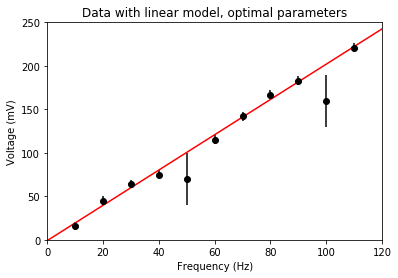

In [14]:
# Plot data with best-fit model
plt.plot(fModel,model(fModel,mOpt,bOpt),'r-')
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (mV)')
plt.title('Data with linear model, optimal parameters')
plt.xlim(0,120)
plt.ylim(0,250)
plt.show()

### Assessing the fit: compute the $\chi^2$ statistic
Beyond visual inspection, also known perjoratively as *$\chi$-by-eye*, we can assess the fit more quantitatively by computing the $\chi^2$ statistic,

$$ \chi^2(\hat{\textbf{p}}) = \sum_{k=1}^N\frac{[y_k - f(x_k,\hat{\textbf{p}})]^2}{\alpha_k^2},$$

where $\hat{\textbf{p}}$ denotes the array of best-fit parameters, $f(x,\hat{\textbf{p}})$ is the model function with independent variable $x$ and parameter array $\hat{\textbf{p}}$, and the sum is over all $N$ data points $(x_k, y_k)$ and standard error $\alpha_k$ in the $y$ variable.

We compute this statistic for our example in the cell below, following three steps. First, we compute the fit *residuals*, given by the set $\{ y_k - f(x_k,\hat{\textbf{p}}) \},$ $k = 0, 1, ... N$, and assign it to the array `res`. Next, we normalize each residual value to its estimated uncertainty, and assign it to `normres`. Finally, we compute the $\chi^2$ statistic by summing over the squares of each normalized residual.

In [ ]:
# Compute and display chi-squared
res = voltage - model(frequency,mOpt,bOpt)
normres = res/err
chi2 = np.sum(normres**2)
print("chi2 =", chi2)

If the model is statistically consistent with the data, then we expect $\chi^2$ to be approximately the same as the number of statistical degrees of freedom $\nu = N - m$, where $N$ is the number of data points and $m$ is the number of fit parameters. In this example, $N = 11$ and $m = 2$, so $\nu = 9$, and the model is consistent with the data. We repeat this calculation with Python in the cell below, using the NumPy `size` function to determine the number of data points and parameters.

In [ ]:
# Compute and display DOF
Ndata = np.size(voltage)
Npar = np.size(pOpt)
dof = Ndata - Npar
print("dof =", dof)

### Assessing the fit: plot the (normalized) residuals
Finally, we can check for statistical consistency by confirming that the residuals do not show any systematic pattern. In this example, the uncertainty in two of the measurements is much larger than the others, so the residual plot is overwhelmed by the deviations at these points, as seen below.

The following cell uses the PyPlot `stem` routine to produce the residual plot, which often shows deviations from the zero line more effectively than a regular scatterplot.

In [ ]:
# Show residuals
plt.stem(frequency,res)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Residual (mV)')
plt.title('Fit residuals')
plt.xlim(0,120)
plt.show()

By plotting the normalized residuals, we can see that the large deviations at 50 Hz and 100 Hz are not unexpectedly large, and that the overall pattern of deviations is consistent with random fluctuations.

In [ ]:
# Show normalized residuals
plt.stem(frequency,normres)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Residual')
plt.title('Normalized residuals')
plt.xlim(0,120)
plt.show()

## Step 8: Decide what to do next
Ideally you will get to the end of this whole process and find that the model fits the data well, and you can report your results with confidence. If time allows, you might even go back and take more data to improve the precision of your parameter estimates. But what happens if your $\chi^2$ statistic is too big or too small, or if the normalized residuals do not appear random? If that's the case, you have a few options:

* Look for defects in your experimental procedure, including the procedure you used to prepare the raw data for analysis (ie, incorrect unit conversion).
* Consider a different model. This may include changes that are based on physical reasoning, such as eliminating approximations to make it more realistic, or purely empirical, such as adding a constant background, or an extra term in a polynomial fit. The residuals should provide guidance on how to change the functional relationship to improve agreement. Just don't overdo it: if you find yourself needing to add many arbitrary fit parameters to achieve a good fit, that is usually a sign that you need to consider a different approach.
* Consider restricting your fit to a narrower range of measurements (i.e., focus on limiting values of $x$ and/or $y$, or on the heights, widths and locations of peaks instead of their detailed shape).
* Consider rescaling the uncertainties, as described in Sec. 8.9 of Hughes and Hase (though note their "health warning" in Footnote 9).
* Accept that you may be unable to remove all sources of systematic error in the given time, and do your best to make a quantitative estimate of your parameter uncertainties in light of them. You don't have to throw all of your data away just because you don't have a model that fits it well.


## Summary
This example can serve as a template for more general problems in data analysis, whether you use Python in a Jupyter notebook or some other computational tool. Let's review the procedure.

* *Load the data:* examine the data file format and import it into an array.
* *Plot the data:* visually inspect the relationship between the independent and dependent variables and evaluate the best way to model it.
* *Define the model:* the model should provide a plausible mathematical description of the data, and will usually involve unknown parameters that you will adjust to obtain the best fit.
* *Fit the model to the data:* pick good initial values for the unknown parameters, then use the computer to determine the optimal values and their uncertainties.
* *Assess the fit quality:* plot the model together with the data, evaluate the $\chi^2$ statistic, and inspect the residuals.
* *Decide what to do next:* if all goes well, report your results and move on. If not, use your results to guide changes to your experiment, your analysis, or both.

This example can also serve as a template for how to use Python in a Jupyter notebook to complete these steps. Let's review the basic Python concepts and expressions.

* *Importing packages:* these will typically include [NumPy](https://docs.scipy.org/doc/numpy-1.15.0/user/index.html), [matplotlib](https://matplotlib.org/users/index.html), and [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html). See [here](https://docs.python.org/3/tutorial/modules.html#packages) for a general introduction to packages.
* *Importing data files:* for simple file formats, use [genfromtext](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
* *Defining functions:* see [here](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) for a general introduction to function definitions.
* *Plotting data:* this is what [matplotlib](https://matplotlib.org/users/index.html) was designed for. Within that package, [PyPlot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) has many routines for interactive plotting, such as [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html), [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), and [stem](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stem.html). Once you have the plot, you can use additional routines to format it, such as [xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html), [title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html), [xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html), and [ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html).
* *Curve fitting:* the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) routine includes all of the features that you need for basic use.
* *Mathematical functions:* Python can perform [basic mathematical operations](https://docs.python.org/3/tutorial/introduction.html#numbers), and NumPy includes several additional [mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html) such as trigonometric functions, exponentials, array products and sums, etc.